### 1. Author and Target
- Created on Tue Jun  8 17:35:22 2021
- @author: Aaron-PC

- Target url : https://zh.wikipedia.org/wiki/%E8%87%BA%E7%81%A3%E4%BA%BA%E5%8F%A3
- Target Table : 人口變化數據(1981~2020年)

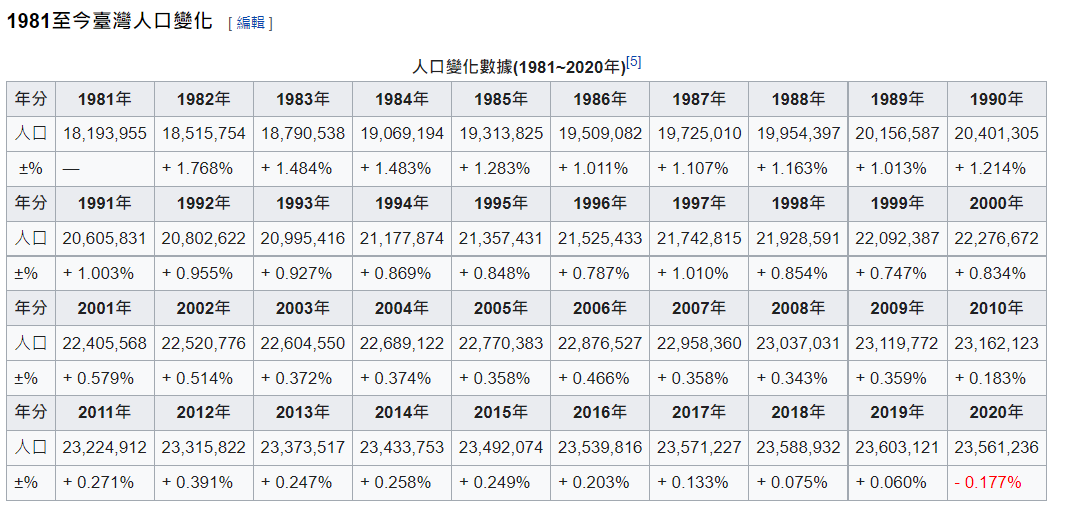

### 2. Python Scratch
- 使用 **urllib** 和 **BeautifulSoup** 進行網路爬蟲

In [3]:
# -*- coding: utf-8 -*-
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup as bs

wiki = 'https://zh.wikipedia.org/wiki/%E8%87%BA%E7%81%A3%E4%BA%BA%E5%8F%A3'
page = urllib.request.urlopen(wiki)
soup = bs(page, 'lxml')

- 目標是所有 html碼中，具`table`格式，且`class`為`wikitable`的表格
- 但符合上述條件的表格有許多種，因此使用`find_all`來抓取符合上述條件者

In [4]:
all_tables = soup.find_all('table',class_="wikitable")

- 列印出所有符合的表格的標題，藉此觀察我們所需的表格是哪一個

In [5]:
for i, table in enumerate(all_tables):
    title = None
    if table.find('caption')!=None:
        title = table.find('caption').text
    print('table:',i,'title:',title)

table: 0 title: None
table: 1 title: 人口變化數據(1981~2020年)[5]

table: 2 title: 人口統計數據(1997~2020年)[6][a]

table: 3 title: 人口數據(1997~2020年)

table: 4 title: 6歲以上常住人口在家使用語言（2010年，每百人）[b][43]



 - 依執行結果可知，我們要的table在 `all_tables[1]`
 - 接著觀察表格資料格式，根據表格進行資料存取 (以下只示範抓取年份與人口)
 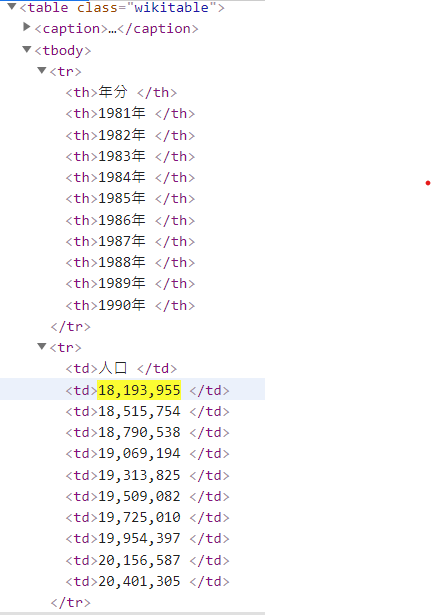

In [10]:
# table : 人口變化數據(1981~2020年)  -> all_tables[1]
year_list = []
people_list = []
tr_list = all_tables[1].find_all('tr')

for i, tr in enumerate(tr_list): 
    # i為計數，若i為3的倍數(0,3,6,9)則為年分，若i除以3餘1則為人口數
    if i % 3 == 0:
        th_list = tr.find_all('th')
        for th in th_list[1:] : #要略調第0筆資料 : '年份'
            year = th.text
            year = year[:4] #去除掉後面的
            year = int(year)
            year_list.append(year)
    
    elif i % 3 == 1:
        th_list = tr.find_all('td')
        for th in th_list[1:] : #要略調第0筆資料 : '人口'
            people = th.text
            people = people[:-1] #去除掉後面的
            people = people.replace(',','')
            people = int(people)
            people_list.append(people)
            
    # i除以3餘2為正負百分比 這裡直接跳過

In [13]:
print(year_list)

[1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [14]:
print(people_list)

[18193955, 18515754, 18790538, 19069194, 19313825, 19509082, 19725010, 19954397, 20156587, 20401305, 20605831, 20802622, 20995416, 21177874, 21357431, 21525433, 21742815, 21928591, 22092387, 22276672, 22405568, 22520776, 22604550, 22689122, 22770383, 22876527, 22958360, 23037031, 23119772, 23162123, 23224912, 23315822, 23373517, 23433753, 23492074, 23539816, 23571227, 23588932, 23603121, 23561236]


### 3. DataFrame and Save Data
- 取出資料後，試著以pandas的DataFrame做資料存取，以便匯出資料 

In [15]:
col_list = []
for i in range(len(year_list)):
    col_list.append([year_list[i], people_list[i]])

In [16]:
print(col_list)

[[1981, 18193955], [1982, 18515754], [1983, 18790538], [1984, 19069194], [1985, 19313825], [1986, 19509082], [1987, 19725010], [1988, 19954397], [1989, 20156587], [1990, 20401305], [1991, 20605831], [1992, 20802622], [1993, 20995416], [1994, 21177874], [1995, 21357431], [1996, 21525433], [1997, 21742815], [1998, 21928591], [1999, 22092387], [2000, 22276672], [2001, 22405568], [2002, 22520776], [2003, 22604550], [2004, 22689122], [2005, 22770383], [2006, 22876527], [2007, 22958360], [2008, 23037031], [2009, 23119772], [2010, 23162123], [2011, 23224912], [2012, 23315822], [2013, 23373517], [2014, 23433753], [2015, 23492074], [2016, 23539816], [2017, 23571227], [2018, 23588932], [2019, 23603121], [2020, 23561236]]


In [21]:
df = pd.DataFrame(col_list,columns=['year','population'])

In [22]:
df[:5] # 查看dataframe前五筆資料

,year,population
0,1981,18193955
1,1982,18515754
2,1983,18790538
3,1984,19069194
4,1985,19313825


- 將DataFrame以csv方式匯出(存檔)

In [23]:
file_name = 'TW_Population.csv'
df.to_csv(file_name)

- 匯出結果圖
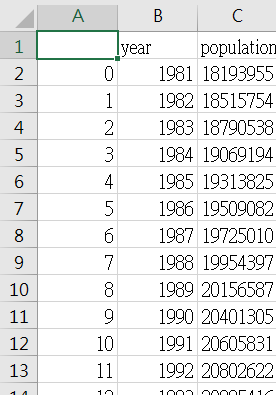

### 4. Matplotlib

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

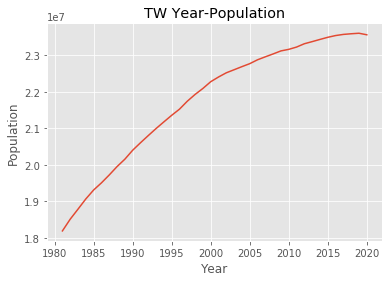

In [35]:
# 建立子圖表
plt.style.use("ggplot") # 使用ggplot主題樣式

# 設定標籤與標題
plt.title('TW Year-Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.plot(year_list, people_list) #(x,y)
